In [1]:
using Base.MathConstants
function golden_section_search(f, a, b, n)
    ρ = φ-1
    d = ρ * b + (1 - ρ)*a
    yd = f(d)
    for i = 1 : n-1
        c = ρ*a + (1 - ρ)*b
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
        a, b = b, c
        end
    end
    return a < b ? (a, b) : (b, a)
end

golden_section_search (generic function with 1 method)

In [2]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

In [10]:
f(x) = exp(x - 2) - x
a, b = bracket_minimum(f, -3)

(-0.44000000000000017, 7.24)

In [11]:
n = (b - a)/(0.00002*log(φ))

797985.3777542505

In [12]:
a, b = golden_section_search(f, a, b, n)

(1.999999995233515, 1.9999999952335155)

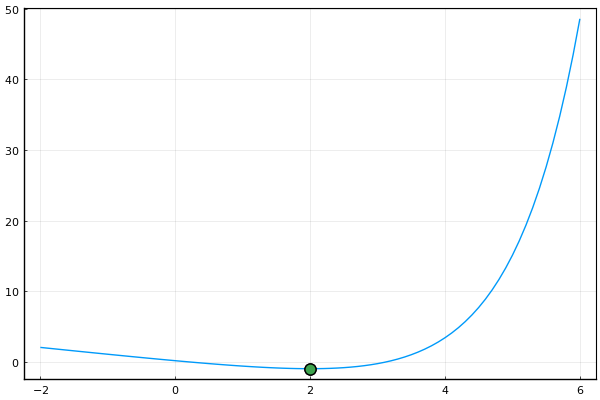

In [13]:
using Plots
pyplot()
x = -2:0.1:6
plot(x, f.(x), label="")
scatter!([a b], [f(a) f(b)], markersize = 8, framestyle = :box, label="")